In [17]:
import os
import fnmatch
import re
import numpy as np
import matplotlib.pyplot as plt
import json

def denormalize(x):
    meanR = -2.0750710241
    stdR = 1.2158839662
    # return  (x - min) / (max - min) # min max normalization
    return x*stdR+meanR  # denormalization
    # return x+100

def find_files(directory, pattern='*.csv'):
    ''' Recursively finds all files matching the pattern.'''
    files = []
    for root, dirnames, filenames in os.walk(directory):
        for filename in fnmatch.filter(filenames, pattern):
            files.append(os.path.join(root, filename))
    return files

def load_data_samples(directory):
    ''' Generator that yields audio waveforms from the directory.'''
    files = find_files(directory, '*')
    #dataFiles = find_files(directory_data)
    print("files length: {}".format(len(files)))
    #id_reg_expression = re.compile(FILE_PATTERN)
    
    for filename in files:
        with open(filename) as f:
            id = 0
            for line in f:
                id += 1
                input = json.loads(line)
                # todo normalize the input
                #print(input)
                data = []
                label = []

                #data.append((input['co2']))
                #data.append((input['surface_temperature']))
                #for i in range (0, len(input['radiation'])):
                #    data.append(normalizeT(input['air_temperature'][i]))
                #    data.append(normalizeH(input['humidity'][i]))
                #    label.append((input['radiation'][i]))

                #for i in range (0, len(input['radiation'])):


                #for i in range (0, len(input['radiation'])):
                #    data.append(normalizeCO2(input['co2']))

                #for i in range (0, len(input['radiation'])):
                #    data.append(normalizeST(input['surface_temperature']))

                #fill last 2 values with 0
                #for _ in range(0, 196-194):
                #    data.append(0.0)

                yield input['air_temperature'], input['humidity'], id

files length: 2
Plots for file #1


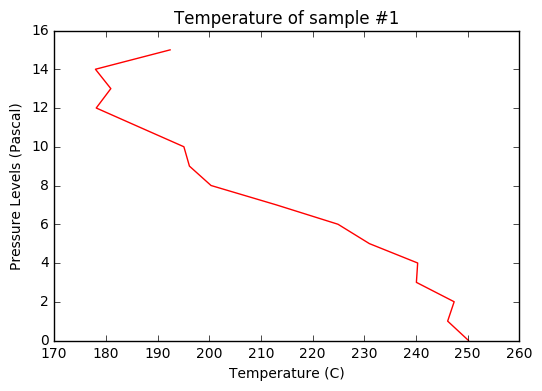

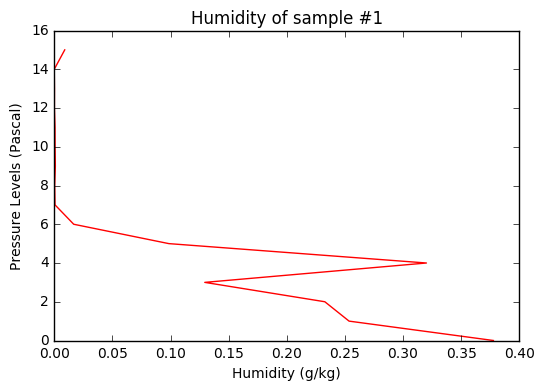

Plots for file #2


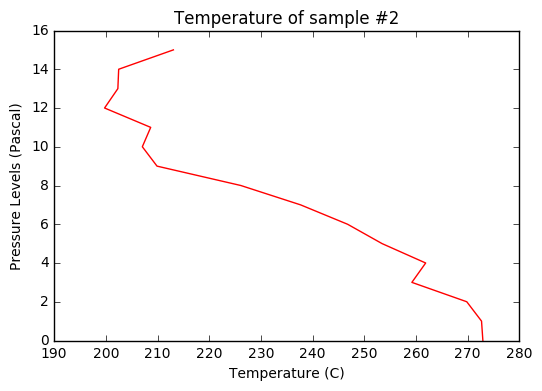

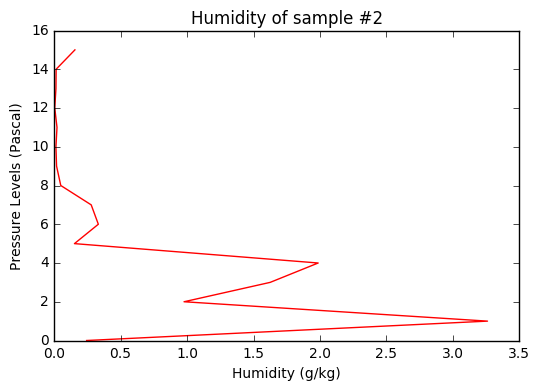

Plots for file #3


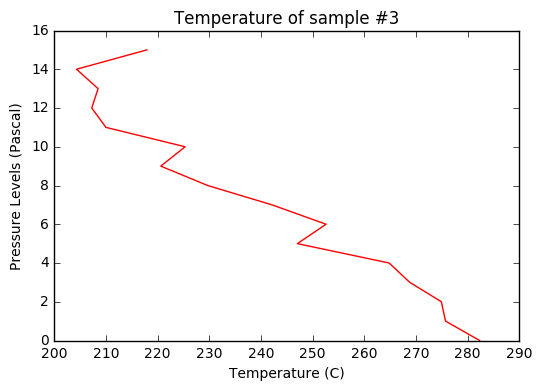

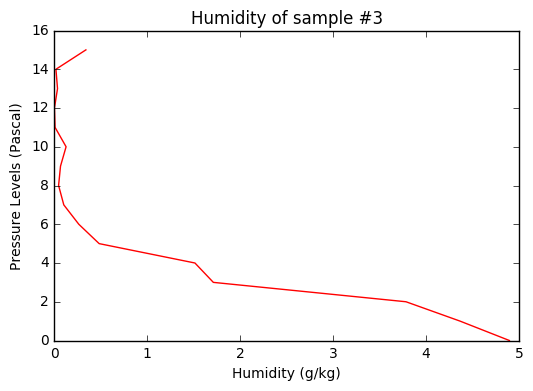

Plots for file #4


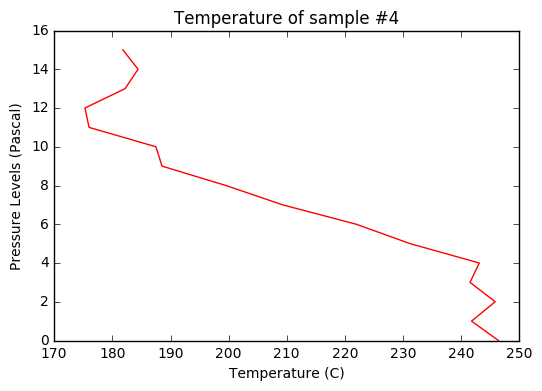

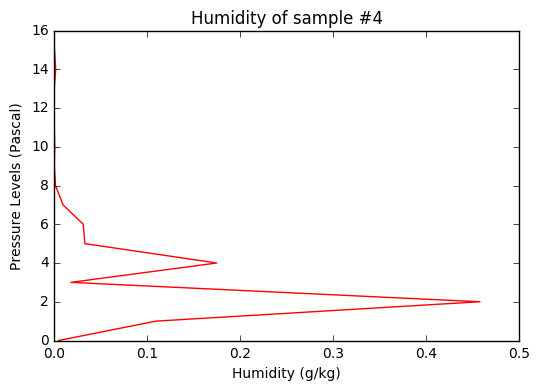

Plots for file #5


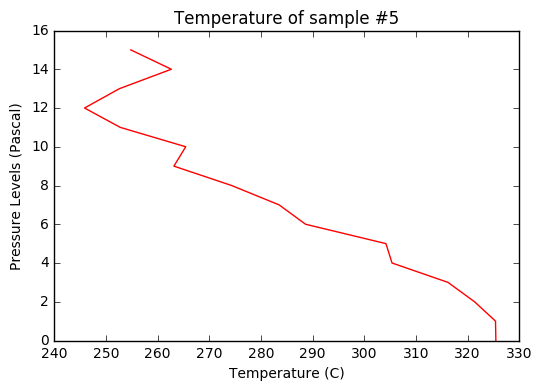

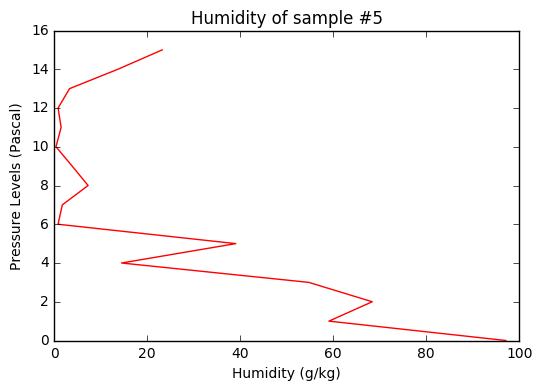

Plots for file #6


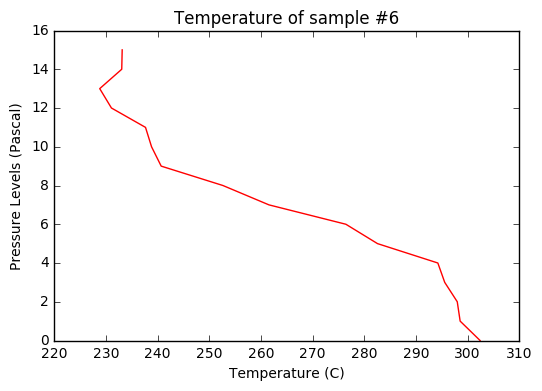

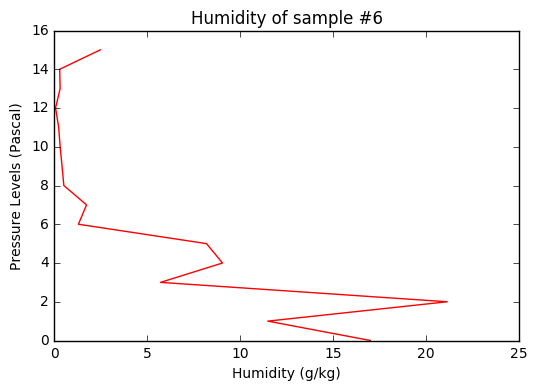

Plots for file #7


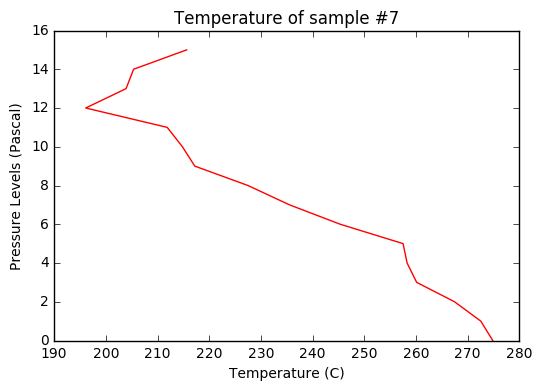

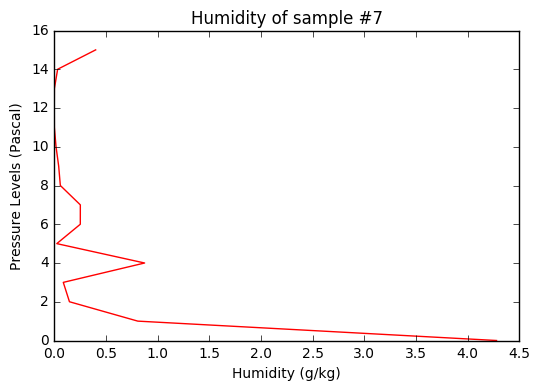

Plots for file #8


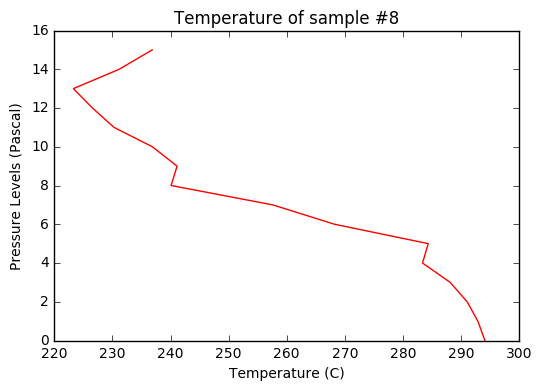

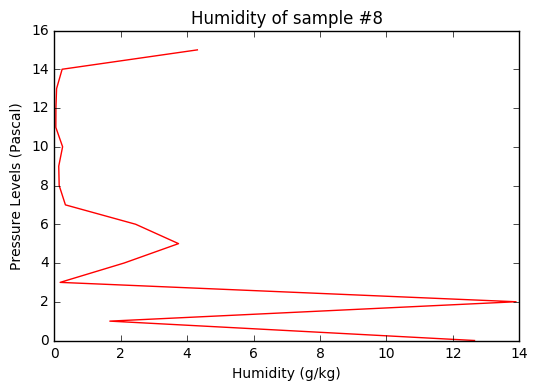

Plots for file #9


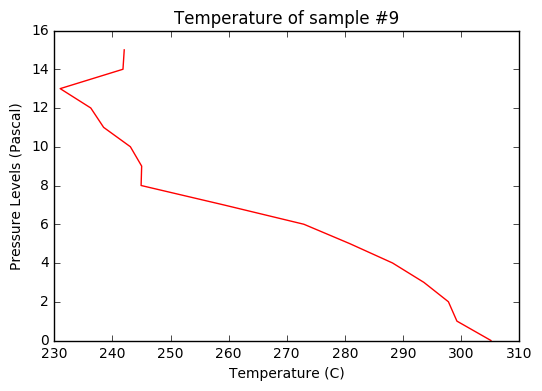

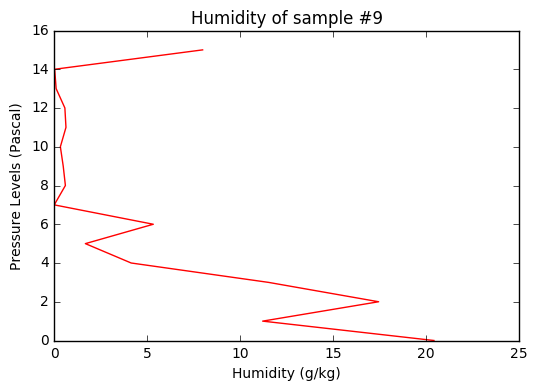

Plots for file #10


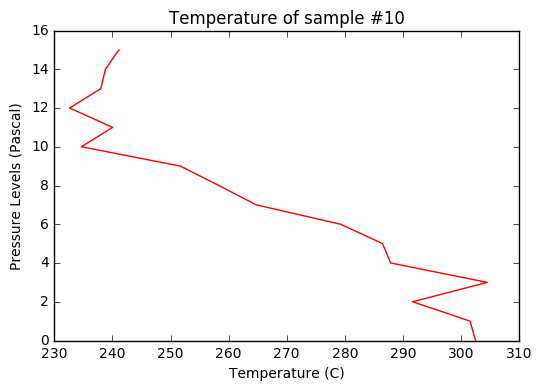

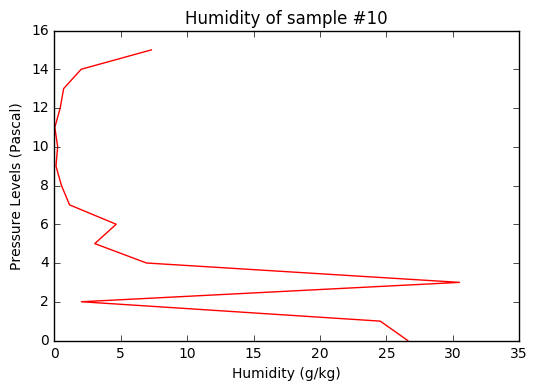

In [20]:

#mydir = '/Users/adam13/Documents/uni/TFM/climate_results/15/'
datadir = '/Users/adam13/Documents/uni/TFM/Data/data_v6/'
files = find_files(mydir)


iterator = load_data_samples(datadir)
#L = np.linspace(3000, int(1e5), 16)
L = np.linspace(0, 15, 16)

errors = list()
count = 0

for T, H, id_file in iterator:
    if(count<10):
        count += 1;
        #errors.append(mse)
        print("Plots for file #{}".format(id_file))
        
     
    
        plt.figure()
        plt.title("Temperature of sample #{}".format(id_file))
        plt.xlabel("Temperature (C)")
        plt.ylabel("Pressure Levels (Pascal)")
        plt.plot(T, L, label="Temperature", color='red' )
        #plt.plot(Q, L, label="Actual Value",color='blue')
        #plt.legend()
        plt.show()
        
        plt.figure()
        plt.title("Humidity of sample #{}".format(id_file))
        plt.xlabel("Humidity (g/kg)")
        plt.ylabel("Pressure Levels (Pascal)")
        plt.plot(H, L, label="Humidity ", color='red' )
        #plt.plot(label, L, label="Actual Value",color='blue')
        #plt.legend()
        plt.show()
        
        
    else:
        break

files length: 2
Plots for file #1


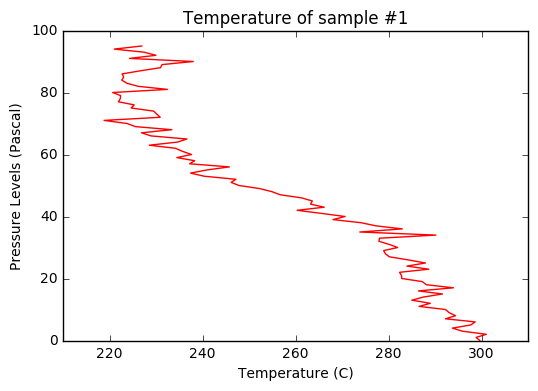

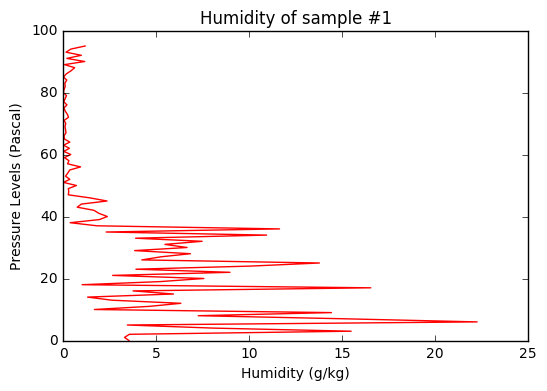

Plots for file #2


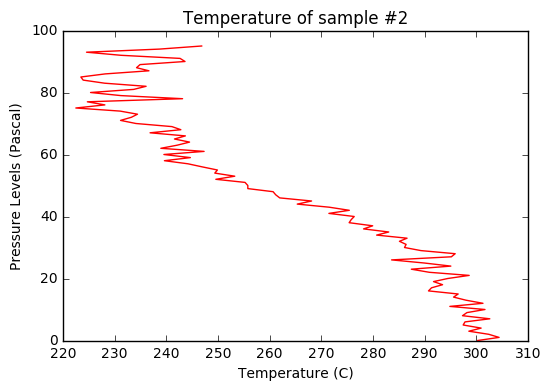

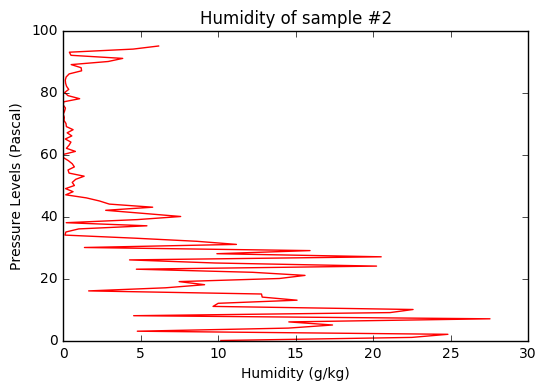

Plots for file #3


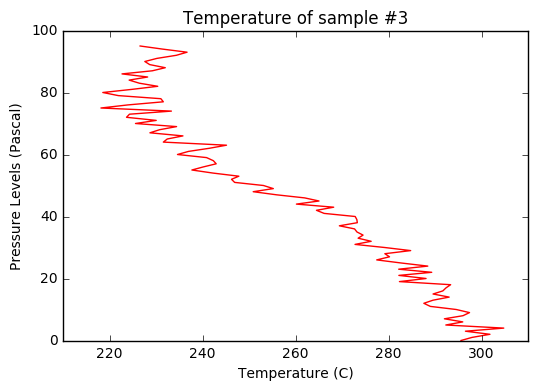

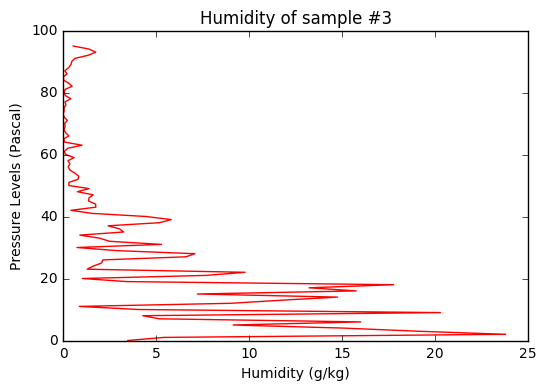

Plots for file #4


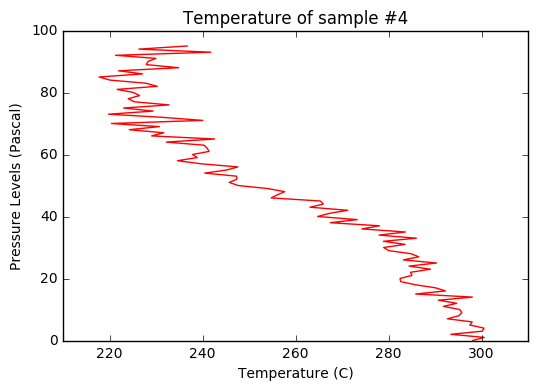

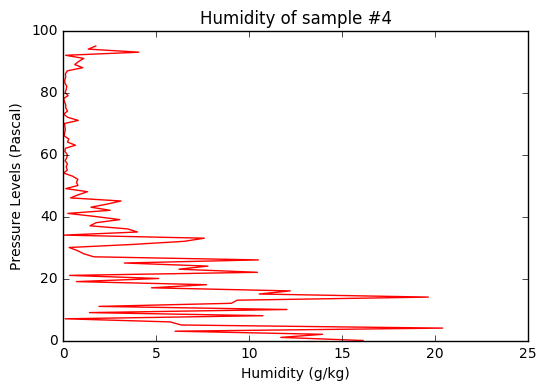

Plots for file #5


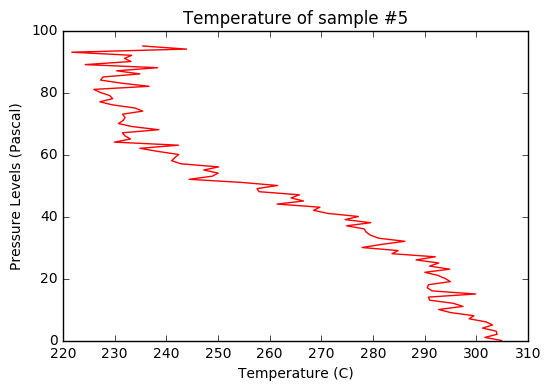

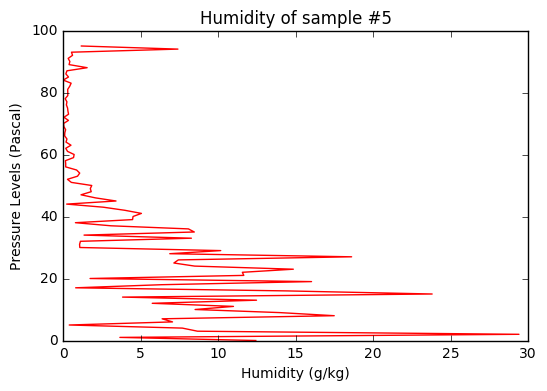

Plots for file #6


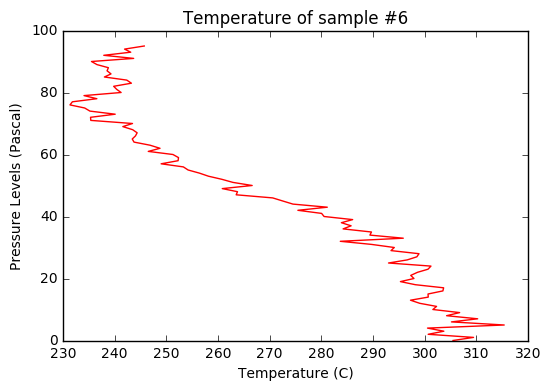

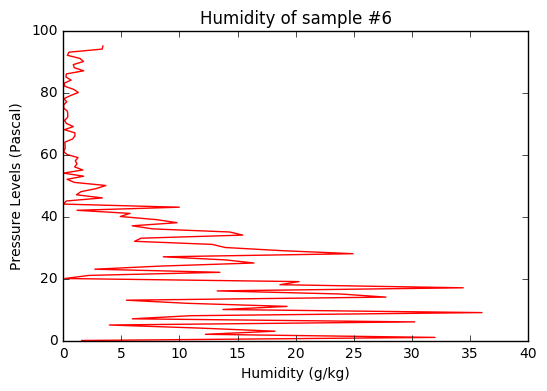

Plots for file #7


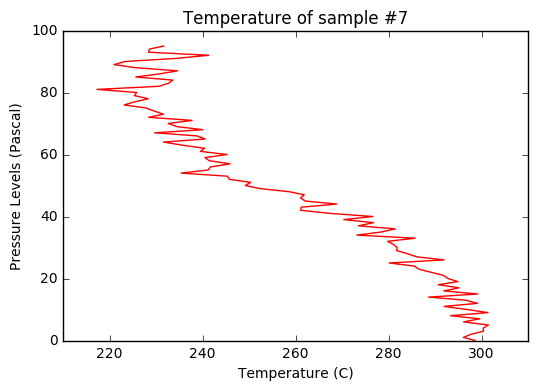

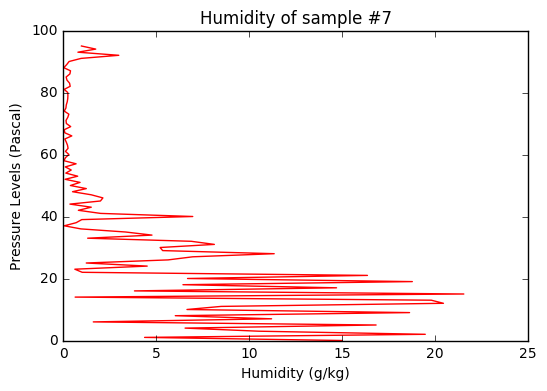

Plots for file #8


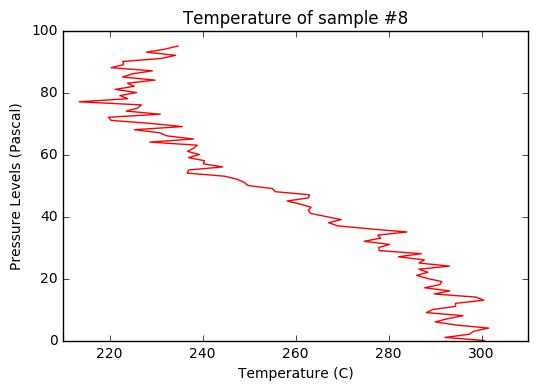

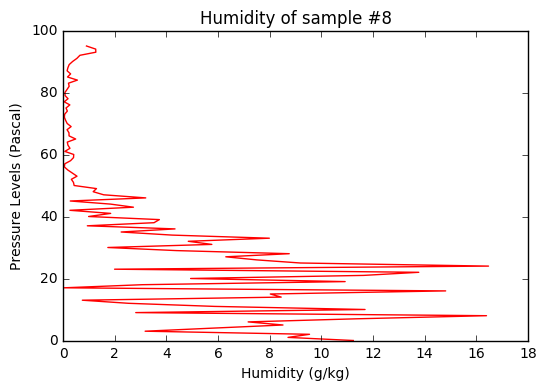

Plots for file #9


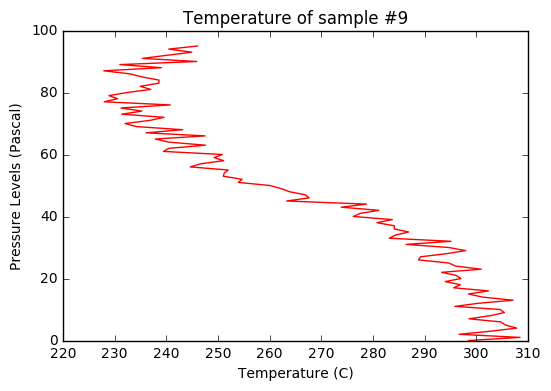

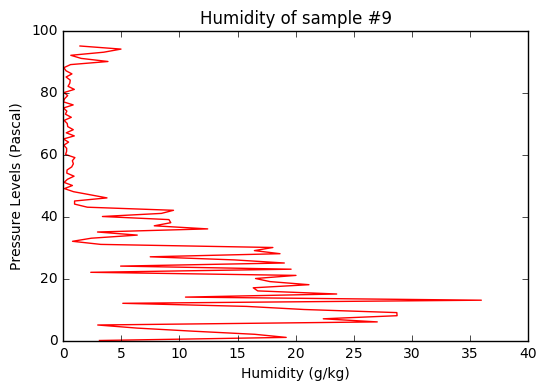

Plots for file #10


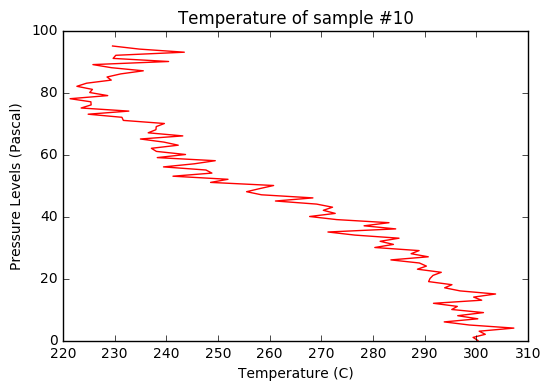

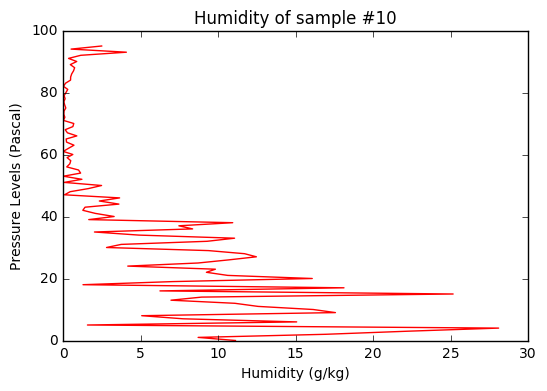

Plots for file #11


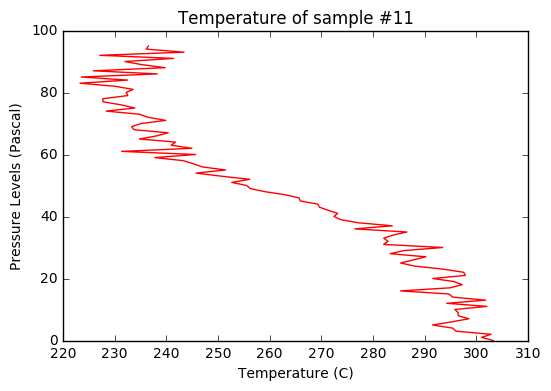

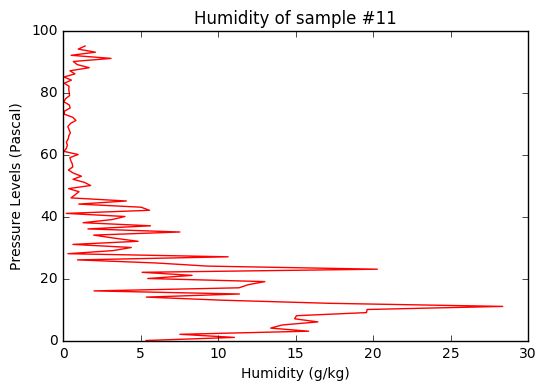

Plots for file #12


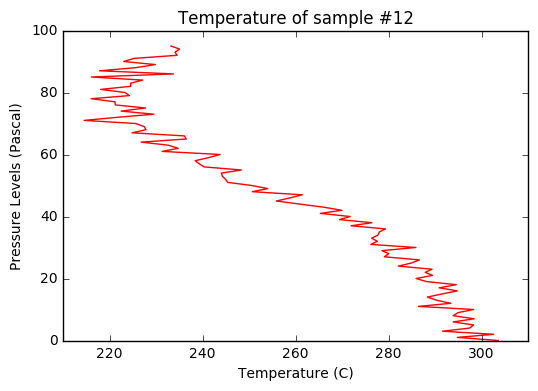

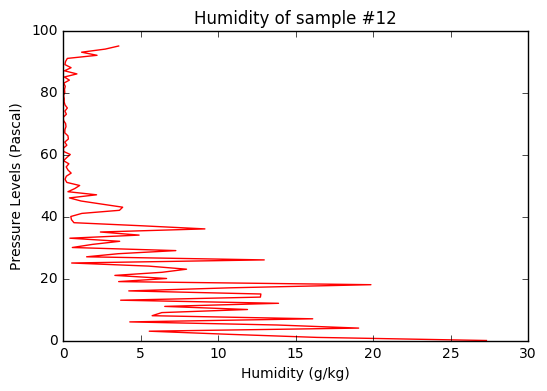

Plots for file #13


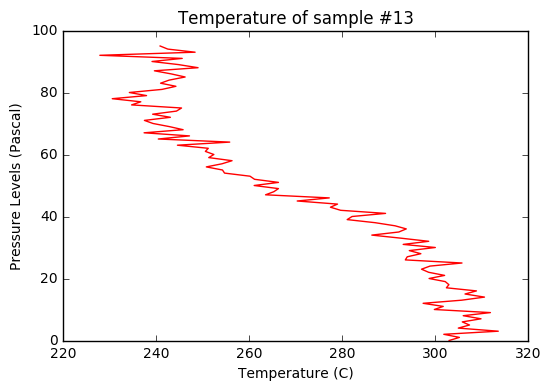

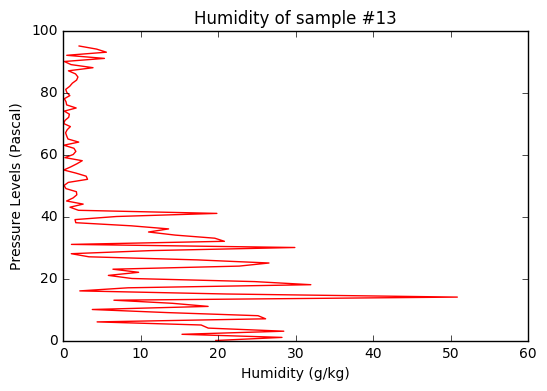

Plots for file #14


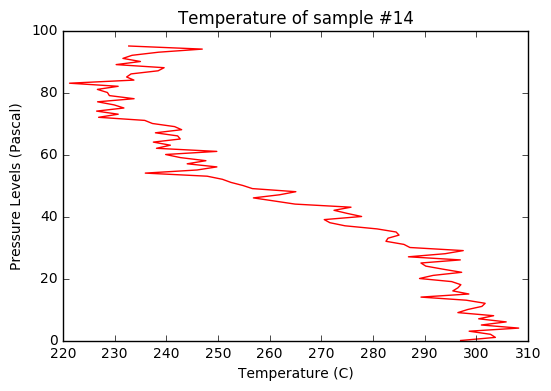

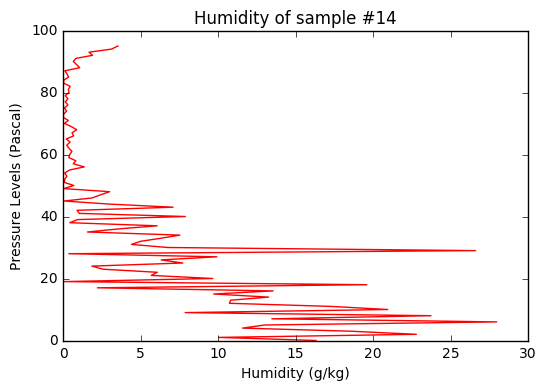

Plots for file #15


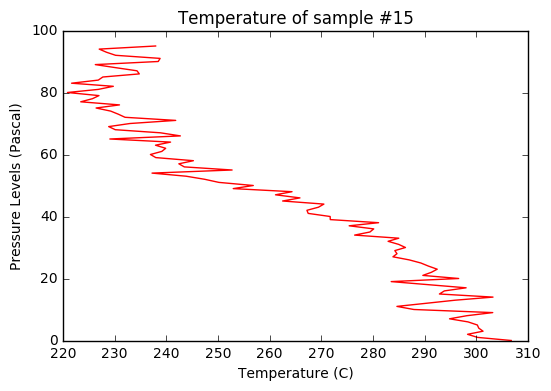

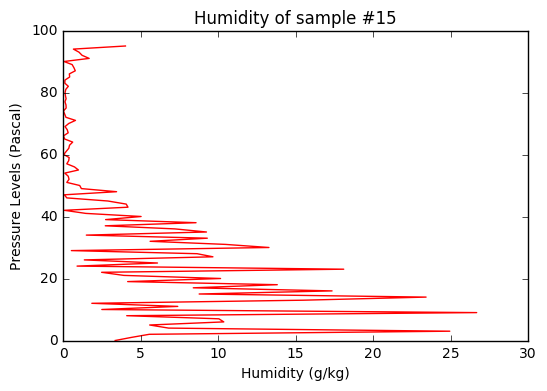

Plots for file #16


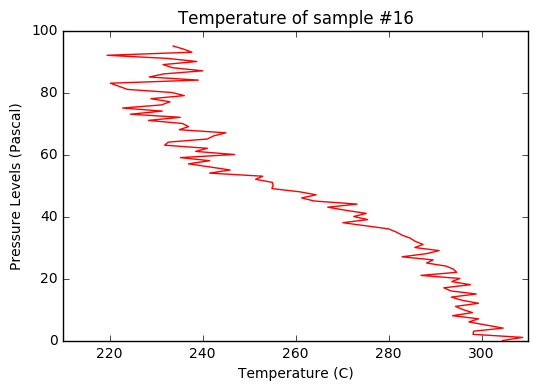

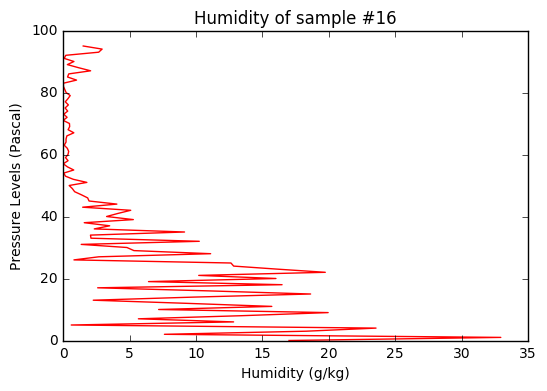

Plots for file #17


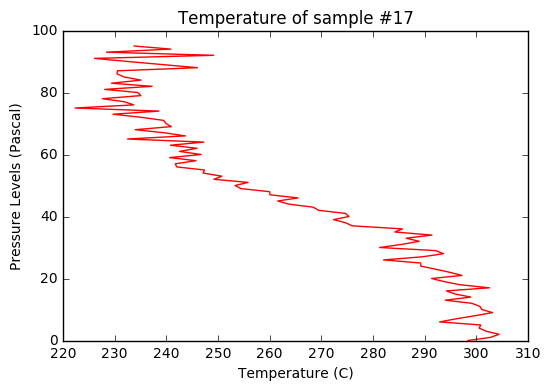

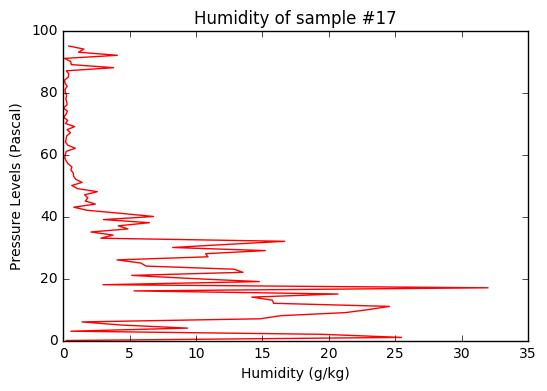

Plots for file #18


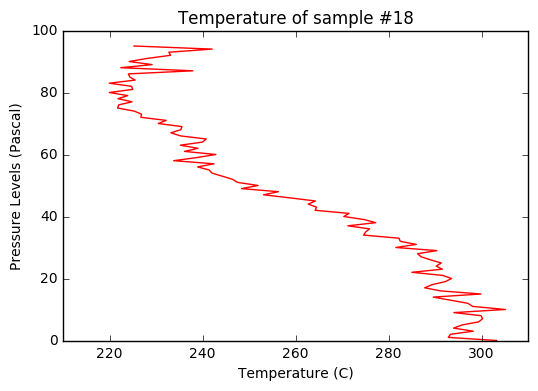

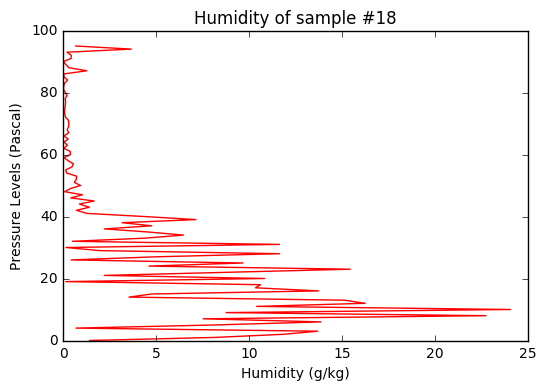

Plots for file #19


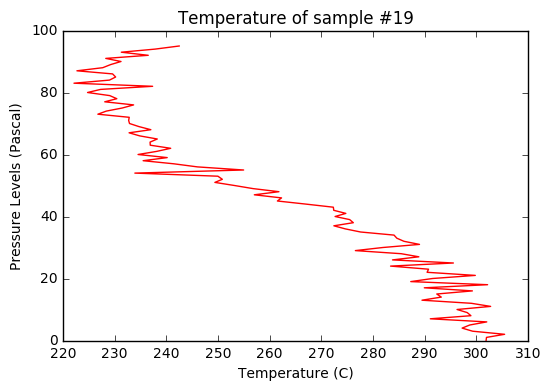

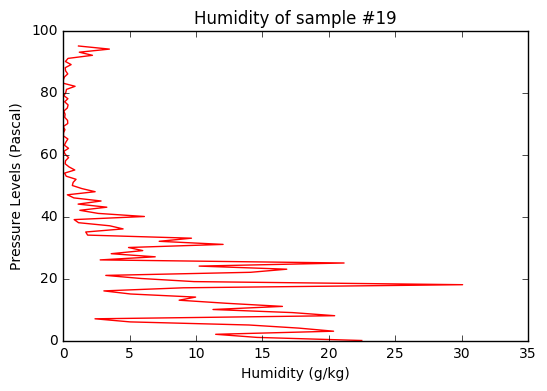

Plots for file #20


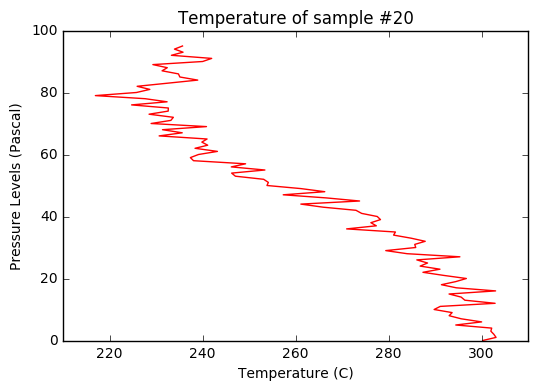

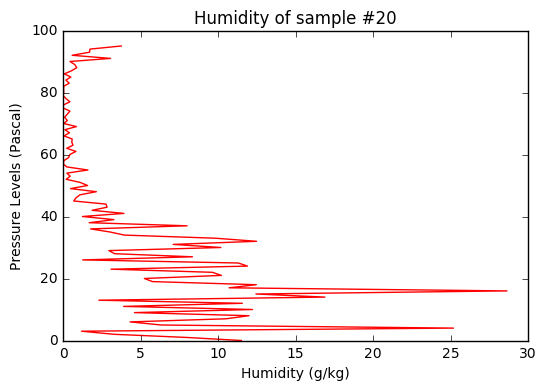

Plots for file #21


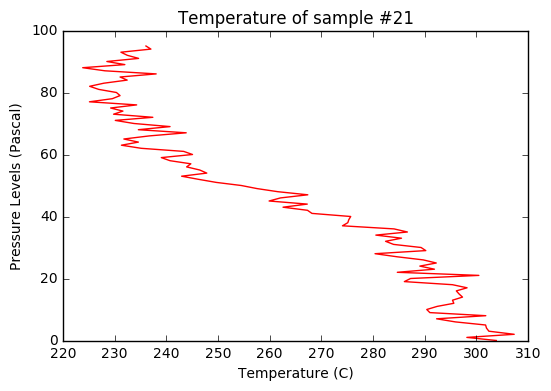

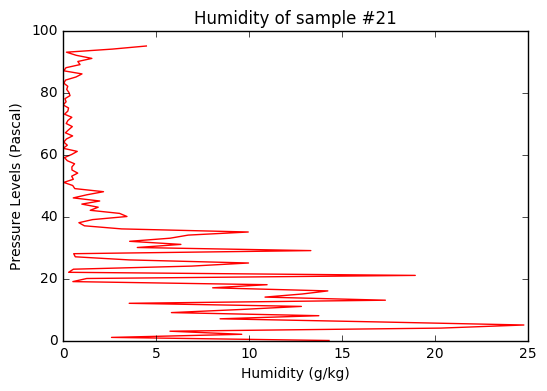

Plots for file #22


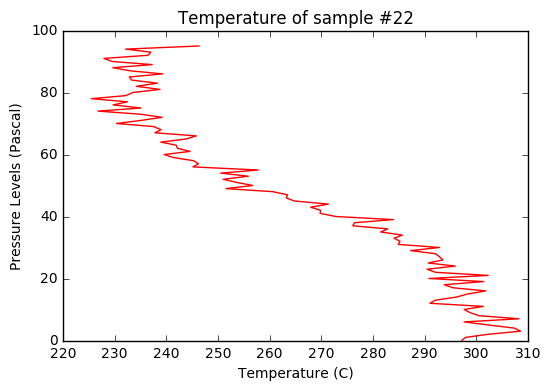

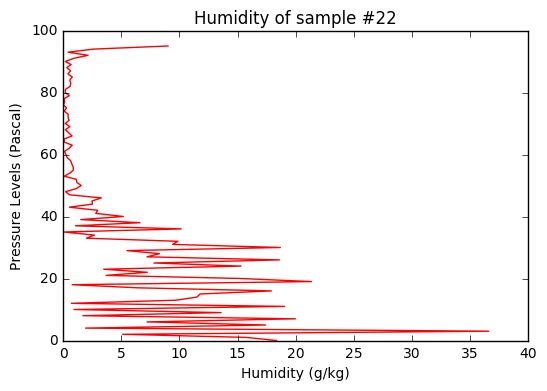

Plots for file #23


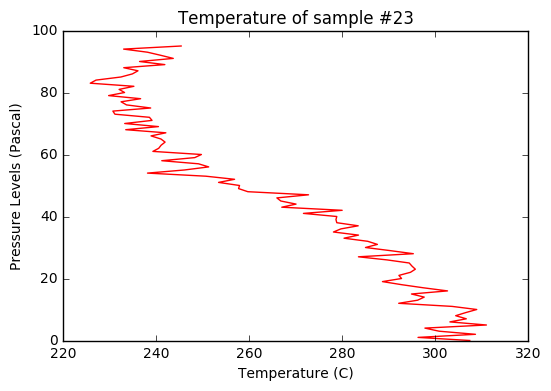

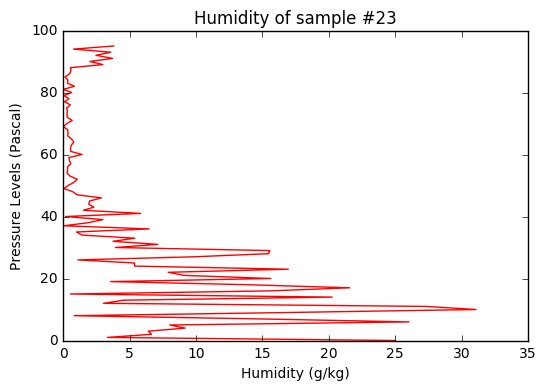

Plots for file #24


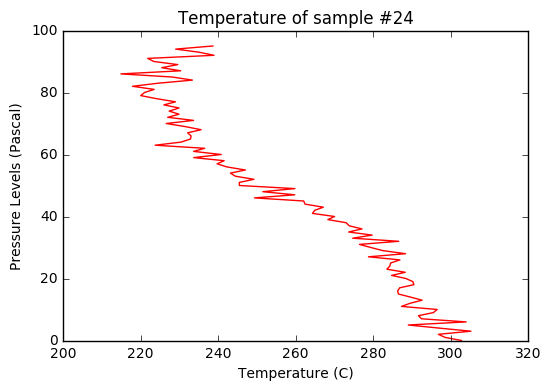

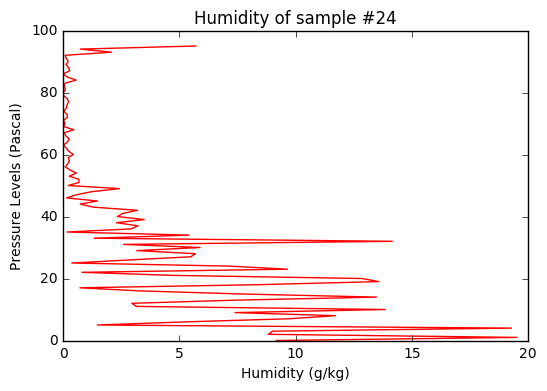

Plots for file #25


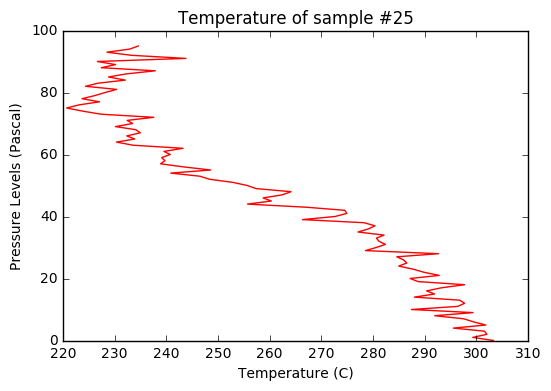

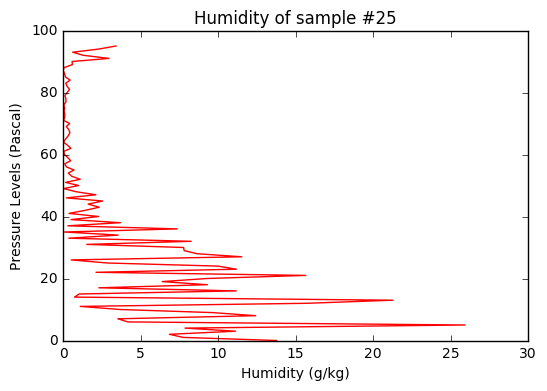

Plots for file #26


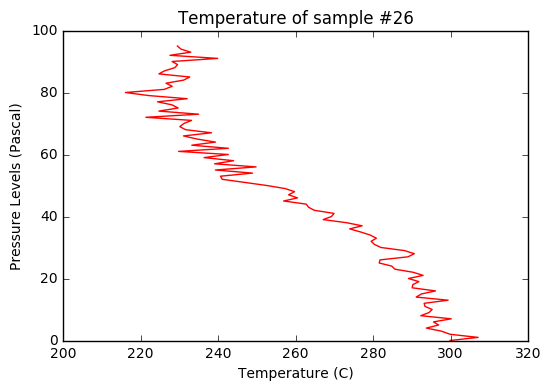

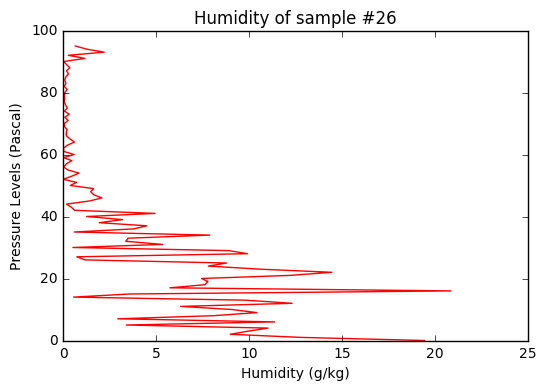

Plots for file #27


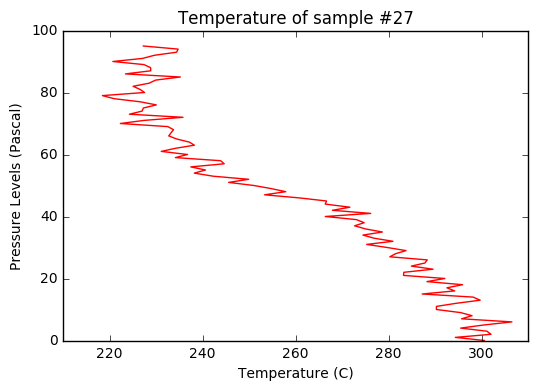

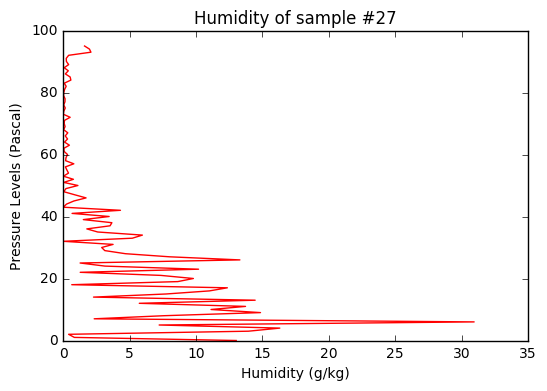

Plots for file #28


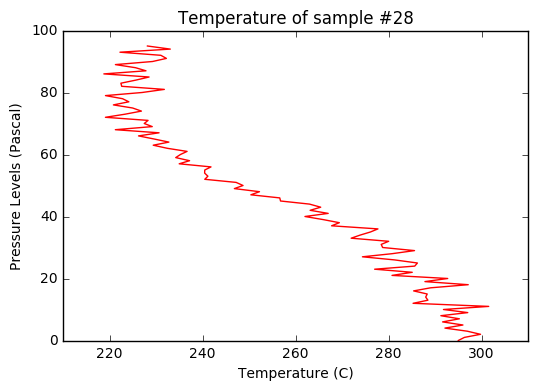

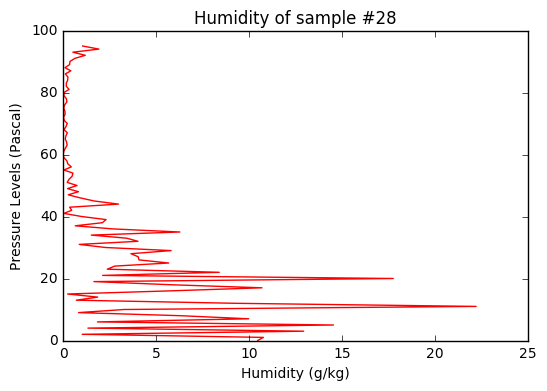

Plots for file #29


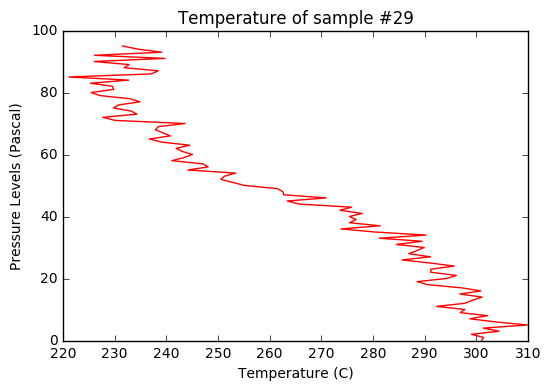

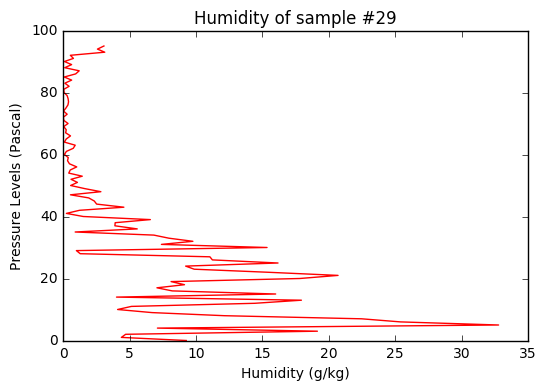

Plots for file #30


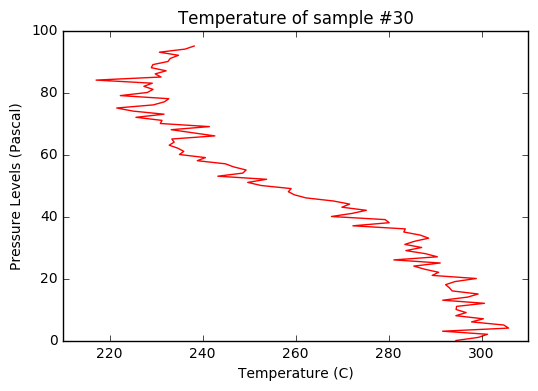

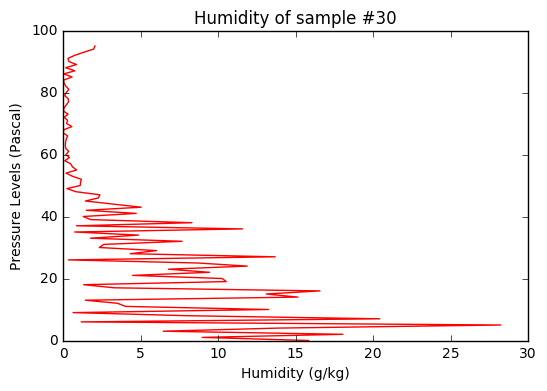

Plots for file #31


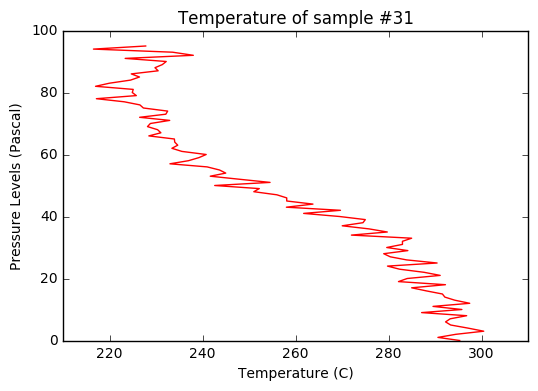

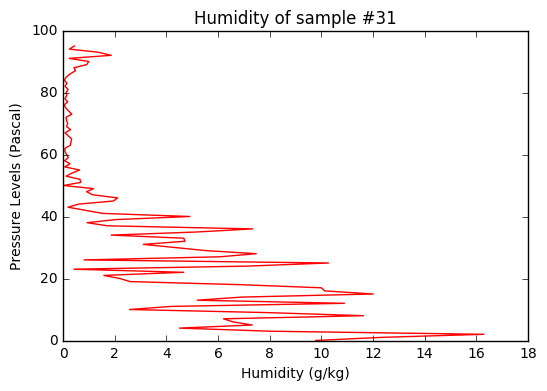

Plots for file #32


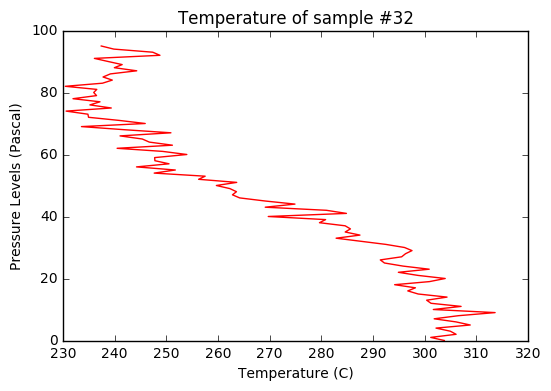

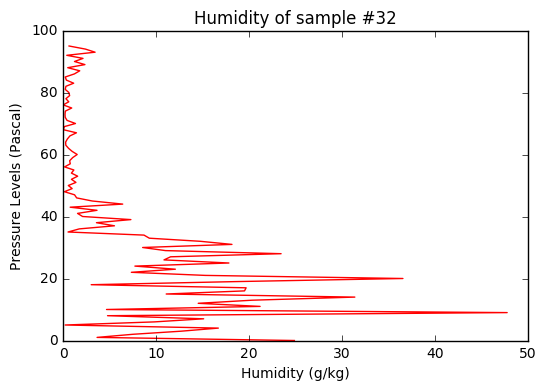

Plots for file #33


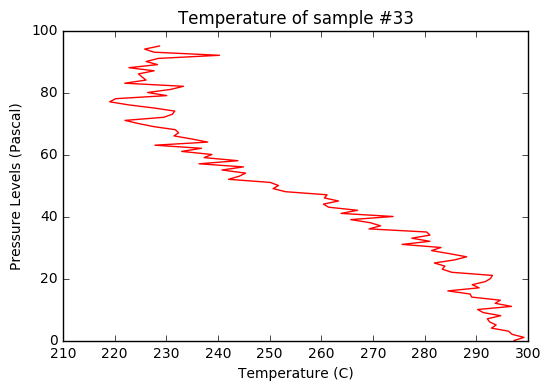

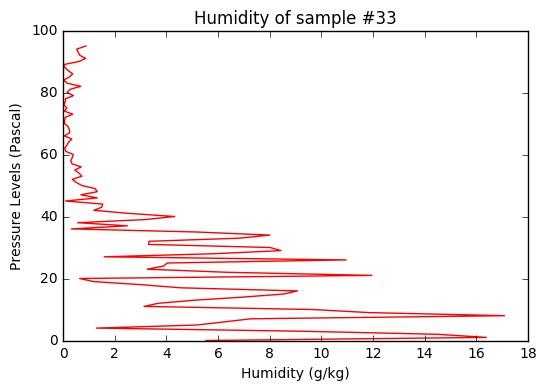

Plots for file #34


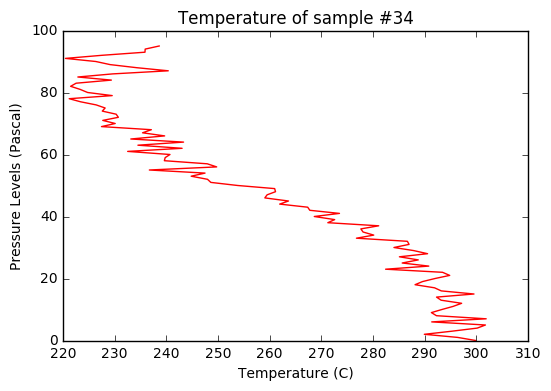

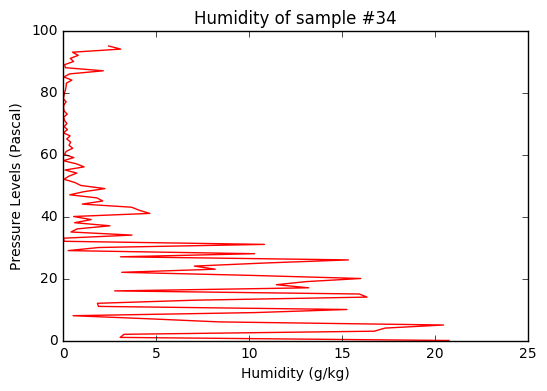

Plots for file #35


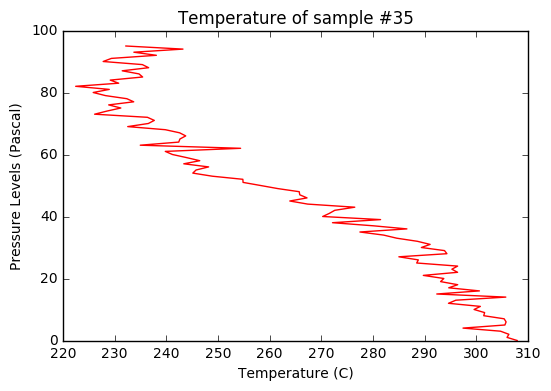

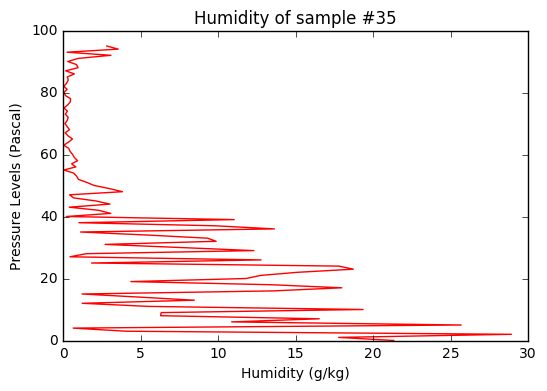

Plots for file #36


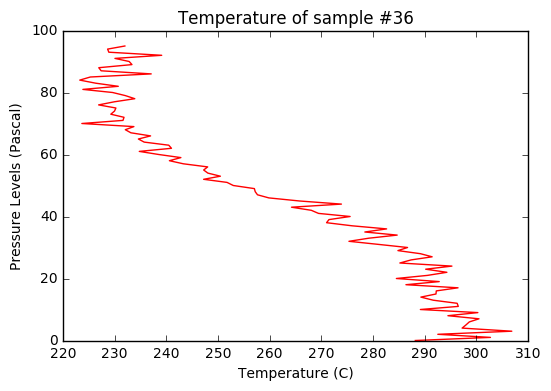

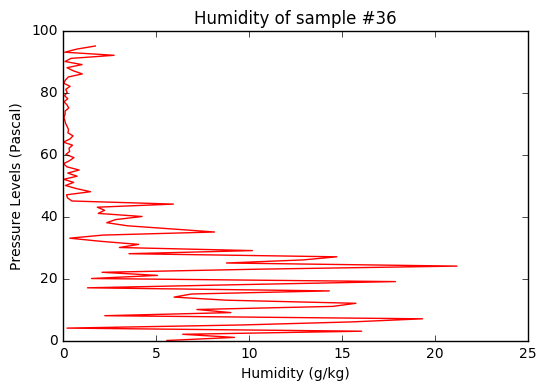

Plots for file #37


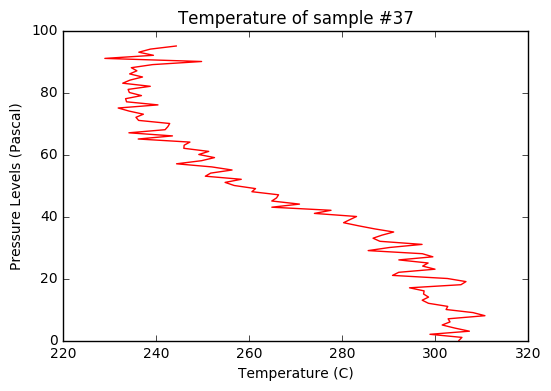

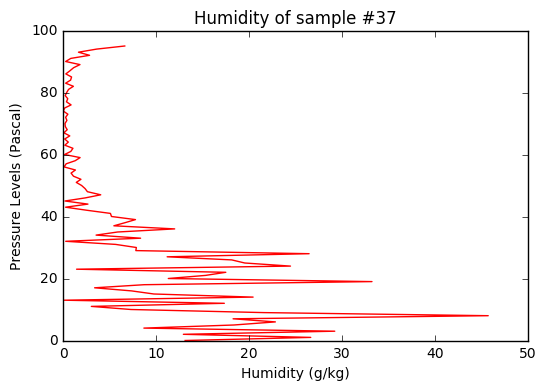

Plots for file #38


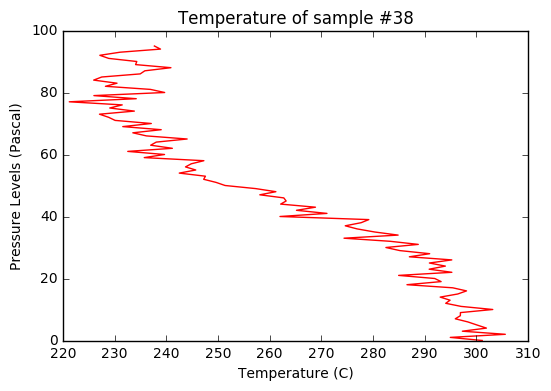

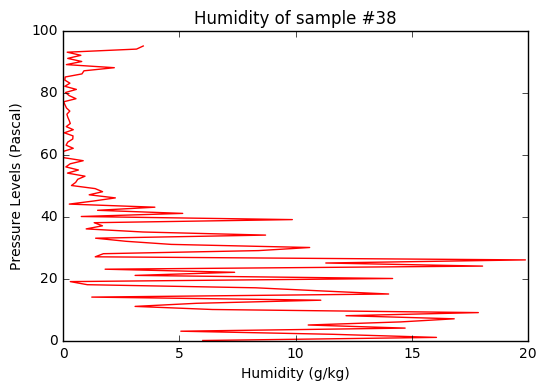

Plots for file #39


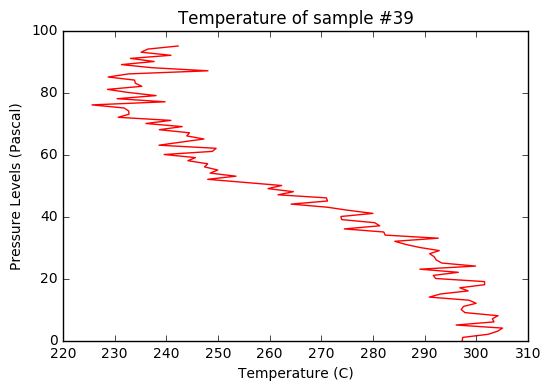

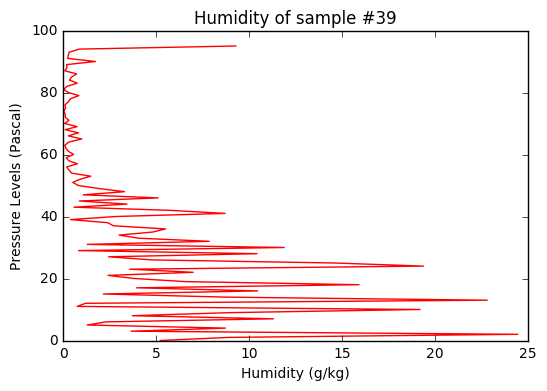

Plots for file #40


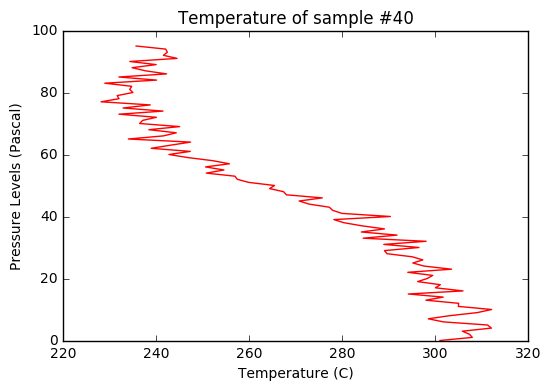

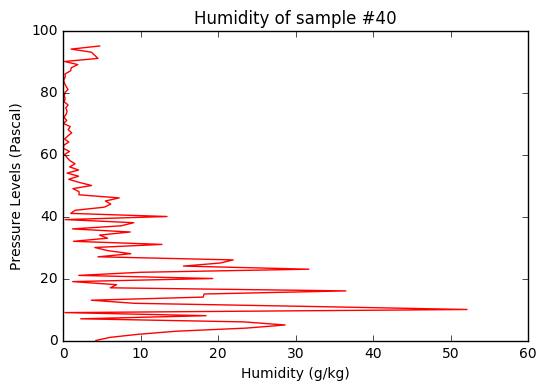

Plots for file #41


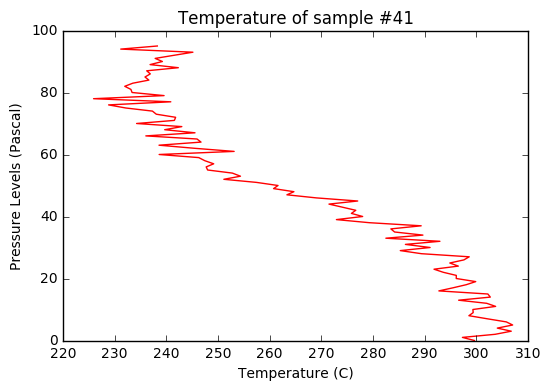

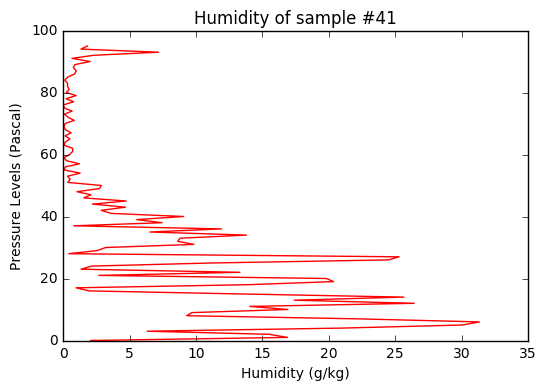

Plots for file #42


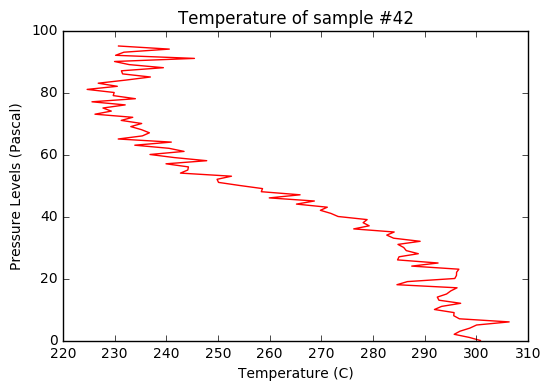

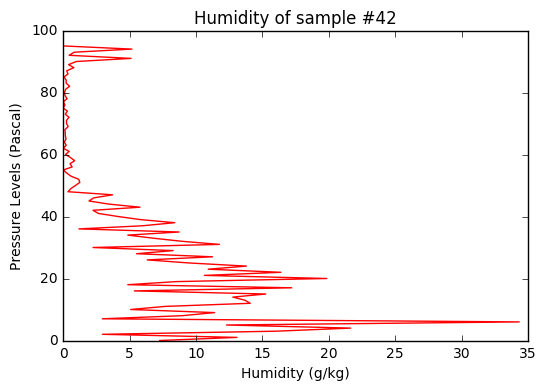

Plots for file #43


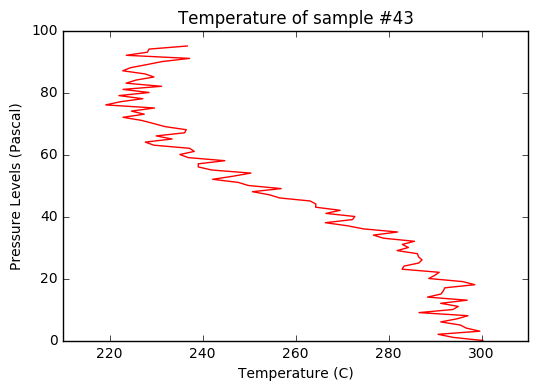

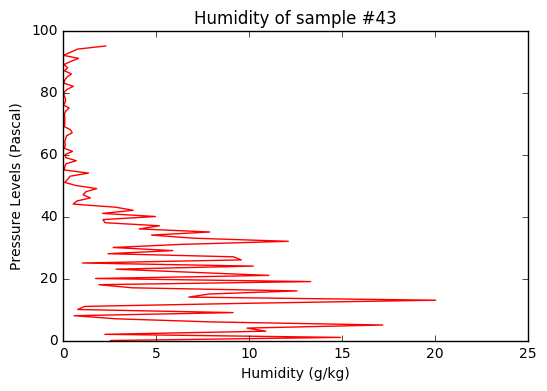

Plots for file #44


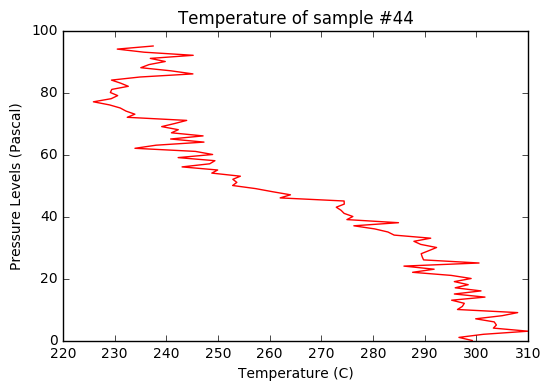

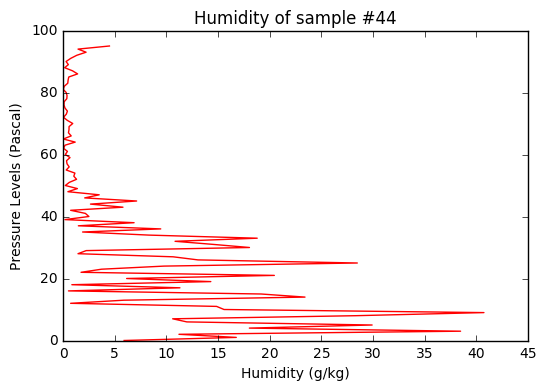

Plots for file #45


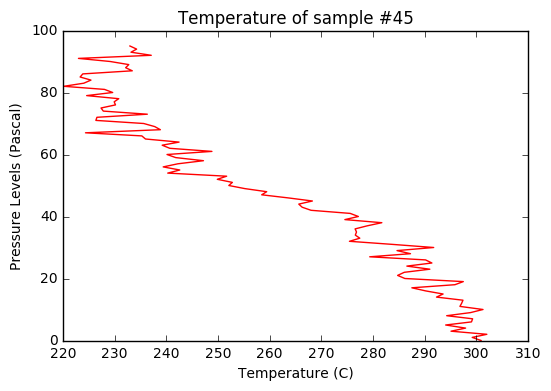

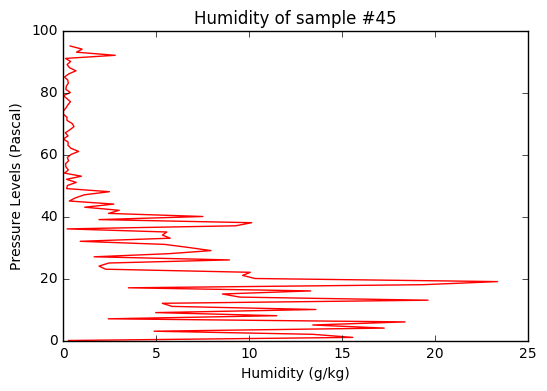

Plots for file #46


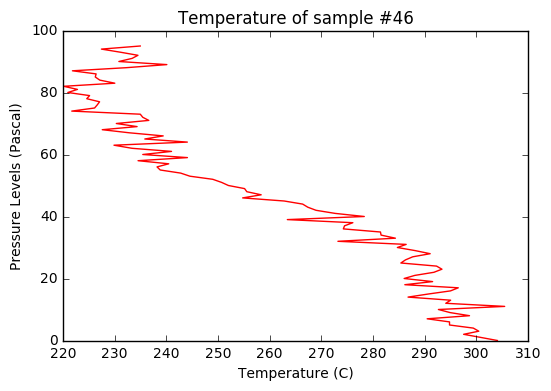

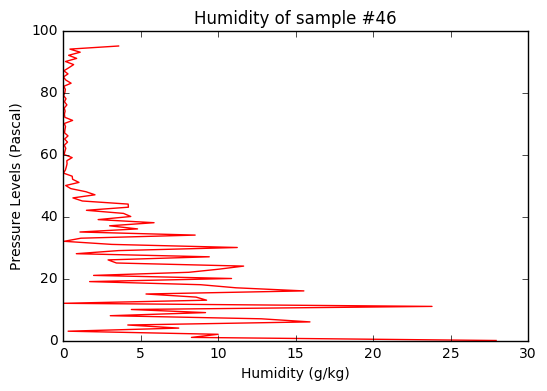

Plots for file #47


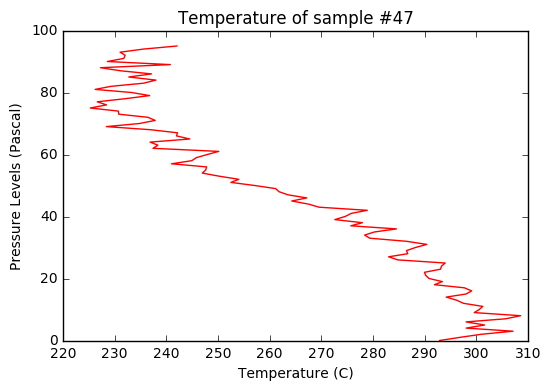

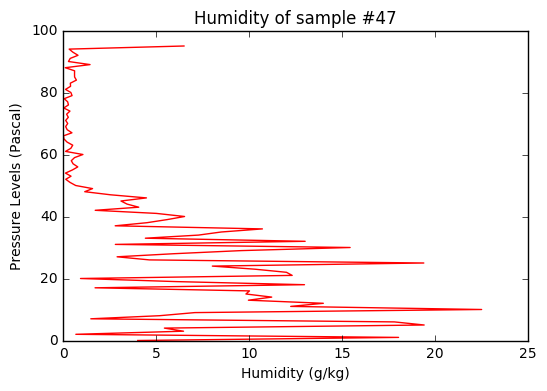

Plots for file #48


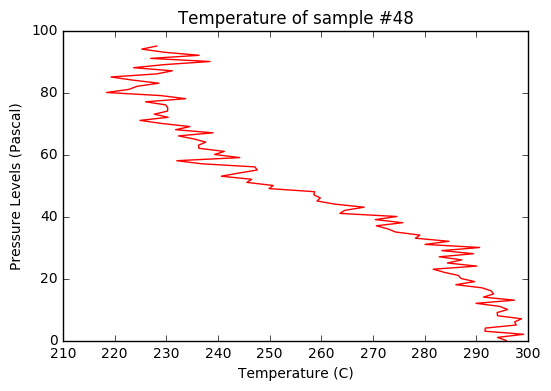

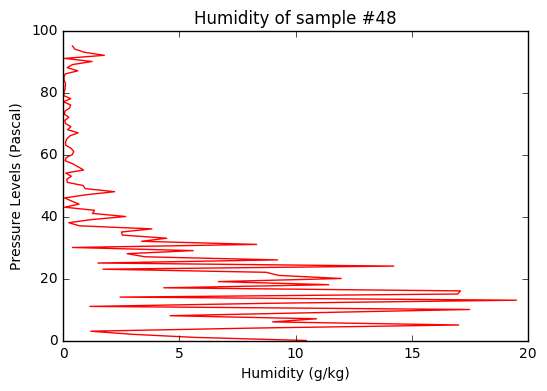

Plots for file #49


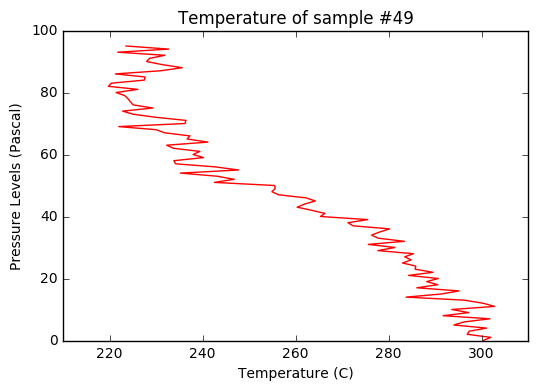

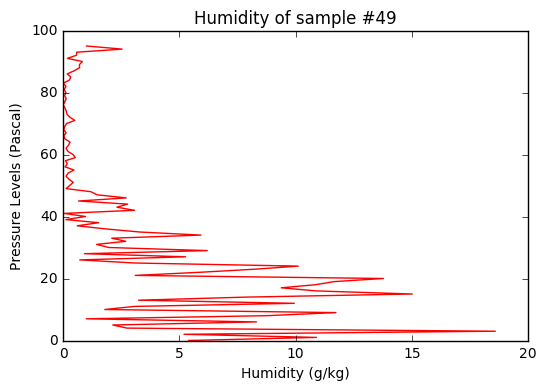

Plots for file #50


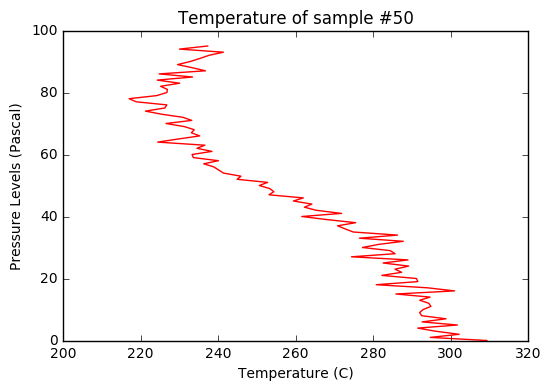

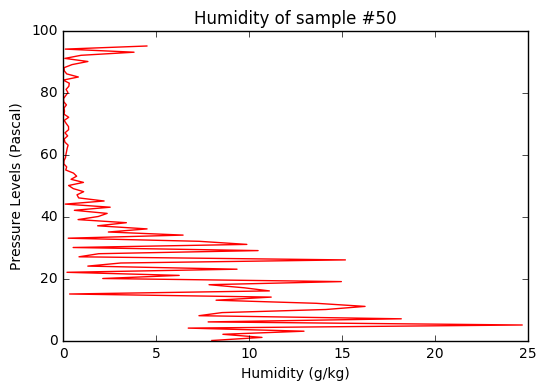

In [21]:
datadir = '/Users/adam13/Documents/uni/TFM/Data/data_v8/'
files = find_files(mydir)


iterator = load_data_samples(datadir)
#L = np.linspace(3000, int(1e5), 16)
L = np.linspace(0, 95, 96)

errors = list()
count = 0

for T, H, id_file in iterator:
    if(count<50):
        count += 1;
        #errors.append(mse)
        print("Plots for file #{}".format(id_file))
        
     
    
        plt.figure()
        plt.title("Temperature of sample #{}".format(id_file))
        plt.xlabel("Temperature (C)")
        plt.ylabel("Pressure Levels (Pascal)")
        plt.plot(T, L, label="Temperature", color='red' )
        #plt.plot(Q, L, label="Actual Value",color='blue')
        #plt.legend()
        plt.show()
        
        plt.figure()
        plt.title("Humidity of sample #{}".format(id_file))
        plt.xlabel("Humidity (g/kg)")
        plt.ylabel("Pressure Levels (Pascal)")
        plt.plot(H, L, label="Humidity ", color='red' )
        #plt.plot(label, L, label="Actual Value",color='blue')
        #plt.legend()
        plt.show()
        
        
    else:
        break

In [79]:
import scipy.interpolate
STATISTIC_PARAMS = {
    't': {
        'mean': 5.16666666667,
        'std': 2.11476292341
    },
    'h': {
        'mean': 0.233333333333,
        'std': 0.137436854187
    },
    'c': {
        'mean': 4.,
        'std': 0.
    },
    'st': {
        'mean': 7.,
        'std': 0.
    }
}

def __interpolate(inputs, output_size=10):
    """ spline interpolation for reducing/augmenting the number of levels.

    :param inputs: array[arrays] with each variable to be interpolated
    :param output_size: number of layers to be interpolated, 100 by default
    :return: array[arrays] with variables for 100 hundred layers
    """
    data = []

    print(inputs)
    size = len(inputs)
    # 100 is just a number that shouldn't matter if is changed
    x = np.linspace(0, 100, size)
    x_ext = np.linspace(0, 100, output_size)

    func = scipy.interpolate.splrep(x, inputs, s=0)
    input_ext = scipy.interpolate.splev(x_ext, func, der=0)
    data.append(input_ext)

    return input_ext

def __pre_process(inputs):
    """ Method that prepares the data for fetching the model.

    :param inputs:
    :return:
    """
    data = {}
    for key, value in inputs.items():
        
        val = __normalize(
            value,
            STATISTIC_PARAMS[key]['mean'],
            STATISTIC_PARAMS[key]['std'])
        
        
        if isinstance(val, np.ndarray):
            # Interpolate the data into the x parameters per layer.
            val = __interpolate(value, 10)
        
        data[key] = val
    

    # Transform the matrix into the expected input for the model
    index = 0
    input = []
    input.append(data['c'] )
    input.append(data['st'])
    for i in range (0, 10):
        input.append(data['t'][i])
        input.append(data['h'][i])

    # fill last 2 values with 0
    for _ in range(0, 196-194):
        input.append(0.0)

    return input

def __normalize(x, mean, std):
    if isinstance(x, list):
        x = np.array(x)
    # return  (x - min) / (max - min) # min max normalization
    if std == 0:
        return x
    return (x - mean) / std  # standardization - zero-mean normalization


In [80]:

data = {
    't': [3,2,5,6,7,8],
    'h': [0.1, 0.2, 0.1, 0.3, 0.2, 0.5],
    'c': 4,
    'st': 7
}


a = __pre_process(data)
print(a)





[3, 2, 5, 6, 7, 8]
[0.1, 0.2, 0.1, 0.3, 0.2, 0.5]
{'t': array([ 3.        ,  1.45922878,  2.28699893,  4.06584362,  5.40317025,
        5.87337296,  6.26748971,  6.86937967,  7.50784941,  8.        ]), 'c': 4, 'h': array([ 0.1       ,  0.23255601,  0.18267032,  0.10123457,  0.13497028,
        0.26848651,  0.29135802,  0.21184271,  0.2173754 ,  0.5       ]), 'st': 7}
[4, 7, 3.0000000000000009, 0.10000000000000002, 1.4592287761012044, 0.2325560128029264, 2.286998933089468, 0.18267032464563335, 4.0658436213991775, 0.10123456790123465, 5.4031702484377391, 0.13497027892089619, 5.8733729614388048, 0.26848651120256056, 6.2674897119341564, 0.29135802469135802, 6.8693796677335772, 0.21184270690443535, 7.5078494131992066, 0.21737540009144948, 8.0, 0.5, 0.0, 0.0]


In [83]:
test= 'tt'
STATISTIC_PARAMS = {
    test: {
        'mean': 5.16666666667,
        'std': 2.11476292341
    },
    'h': {
        'mean': 0.233333333333,
        'std': 0.137436854187
    },
    'c': {
        'mean': 4.,
        'std': 0.
    },
    'st': {
        'mean': 7.,
        'std': 0.
    }
}
print(STATISTIC_PARAMS)

{'st': {'std': 0.0, 'mean': 7.0}, 'c': {'std': 0.0, 'mean': 4.0}, 'tt': {'std': 2.11476292341, 'mean': 5.16666666667}, 'h': {'std': 0.137436854187, 'mean': 0.233333333333}}


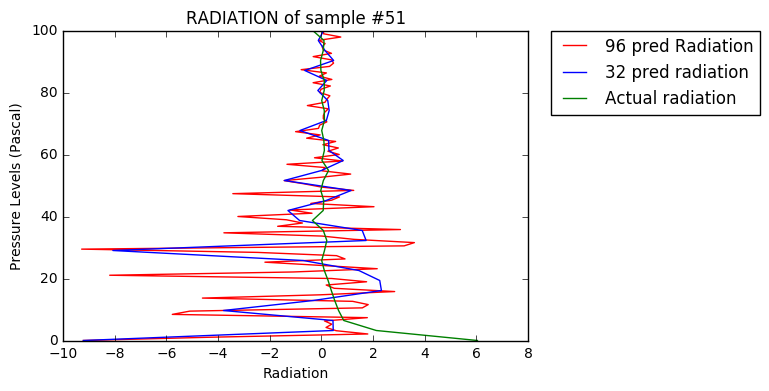

In [95]:
a = [ -9.21643353e+00,  -4.31916523e+00,   1.79325390e+00,   5.68692267e-01,
   1.77378297e-01,   3.99593771e-01,   1.16679192e-01,   1.77548742e+00,
  -5.77384233e+00,  -5.09784985e+00,   1.58213580e+00,   1.80916512e+00,
   1.20977139e+00,  -4.60765171e+00,  -4.81177568e-02,   2.83333778e+00,
   4.93577719e-01,   1.83461189e-01,   1.74709630e+00,   3.96263421e-01,
  -8.19710350e+00,  -1.09395552e+00,   2.15849638e+00,  -1.66600943e-03,
  -2.18897891e+00,   9.12252665e-01,   5.84957480e-01,  -2.47860146e+00,
  -9.28318501e+00,   3.20092821e+00,   3.59741354e+00,   1.25461638e+00,
   2.78487206e-02,  -3.77667522e+00,   3.05700922e+00,  -1.69484568e+00,
  -7.35890865e-01,  -1.35704231e+00,  -3.23396683e+00,  -3.66407990e-01,
  -1.21741819e+00,   2.03277564e+00,  -4.12799895e-01,   3.94906640e-01,
   6.95998430e-01,  -3.43076563e+00,   1.24886203e+00,   9.56267118e-03,
  -6.62173927e-01,  -1.44368672e+00,  -5.37701845e-02,   1.13169098e+00,
   2.15928853e-02,   1.39395371e-01,  -1.33518159e+00,   8.22644472e-01,
  -2.68376946e-01,   6.86999619e-01,   2.49330461e-01,   6.53327286e-01,
   5.58822453e-02,   5.48907399e-01,  -5.73419631e-01,  -5.12916148e-02,
  -1.00165761e+00,  -1.15157679e-01,  -6.97074831e-02,   2.09071517e-01,
   7.07636476e-02,   7.43193999e-02,   1.32078230e-01,   2.67025113e-01,
  -5.45344532e-01,   1.36537611e-01,   2.15331167e-01,   3.26457679e-01,
  -7.16702119e-02,  -1.81481838e-02,   3.45655650e-01,  -3.23230505e-01,
   4.02298898e-01,  -8.32304209e-02,   1.92133069e-01,  -7.85326004e-01,
   3.13955337e-01,   4.67903197e-01,   3.89366448e-01,  -3.20446163e-01,
   3.87024283e-01,   7.50219226e-02,   2.76375413e-02,   1.41673863e-01,
  -9.93855000e-02,   7.47843266e-01,   7.90014267e-02,   8.71376395e-02]
b = [ -9.21643353e+00,   4.55220996e-01,   4.46390421e-01,  -3.79494019e+00,
  -3.18754094e-01,   2.32083540e+00,   2.25642000e+00,   1.44837175e+00,
  -7.08744531e-01,  -8.07458561e+00,   1.72893273e+00,   1.57882741e+00,
  -8.47168795e-01,  -1.29758607e+00,   1.82127718e-01,   1.14628395e+00,
  -1.43804190e+00,   2.78580256e-03,   8.41912651e-01,   2.90036245e-01,
   2.77559533e-01,  -8.32865697e-01,   1.89328927e-01,   2.98938515e-01,
   2.43748183e-01,  -1.39777165e-01,   2.04980830e-01,  -6.45399525e-01,
   4.71009267e-01,   1.36265270e-01,  -1.23253170e-01,   8.71376395e-02]
real_radiation = [6.037945066746532, 2.1228856793235265, 0.8640300689689926, 0.6618190082806461,
                      0.5130473130154292, 0.3811269633019385, 0.25694085064029254, 0.10987118219723872,
                      0.008861691876843266, 0.11739100409387607, 0.20663198034698033, 0.07140419070477629,
                      -0.35027406116947035, 0.06726209095091104, 0.08840671365240325, -0.02640802504034214,
                      0.07425301417793244, 0.27522285162502996, 0.0198551347752886, 0.11234569358043611,
                      0.09377283500063857, 0.010228888329093343, 0.11451592796917073, 0.10823494740708535,
                      0.01005350757690271, 0.10595362060224307, 0.11087531461633414, -0.02115916479288688,
                      -0.03511322336147305, 0.07028039501188008, 0.09930397875821231, -0.3387499429930506]

y1 = np.linspace(0, 100, len(a))
y2 = np.linspace(0, 100, len(b))

plt.figure()
plt.title("RADIATION of sample #{}".format(id_file))
plt.xlabel("Radiation")
plt.ylabel("Pressure Levels (Pascal)")
plt.plot(a, y1, label="96 pred Radiation", color='red' )
plt.plot(b, y2, label="32 pred radiation",color='blue')
plt.plot(real_radiation, y2, label="Actual radiation",color='green')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

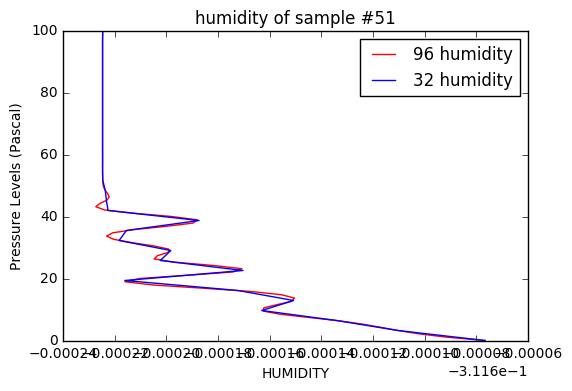

In [96]:
a = [-0.31167667, -0.31169125, -0.31170186, -0.31170991, -0.31171682, -0.31172399,
 -0.31173285, -0.31174423, -0.31175545, -0.31176255, -0.31176233, -0.31175712,
 -0.31175166, -0.31175042, -0.31175534, -0.31176699, -0.31178544, -0.31180493,
 -0.31181607, -0.31181031, -0.31179183, -0.31177426, -0.3117708,  -0.31178192,
 -0.31179685, -0.3118048,  -0.31180345, -0.31179929, -0.3117991,  -0.31180501,
 -0.31181342, -0.31182039, -0.31182318, -0.31182081, -0.31181246, -0.31179995,
 -0.3117896,  -0.31178816, -0.31179803, -0.31181255, -0.3118239,  -0.31182736,
 -0.31182575, -0.31182305, -0.31182217, -0.31182272, -0.3118237,  -0.31182432,
 -0.31182458, -0.31182465, -0.31182469, -0.31182471, -0.31182473, -0.31182473,
 -0.31182473, -0.31182472, -0.31182472, -0.31182472, -0.31182473, -0.31182473,
 -0.31182473, -0.31182473, -0.31182473, -0.31182473, -0.31182473, -0.31182473,
 -0.31182473, -0.31182473, -0.31182473, -0.31182473, -0.31182473, -0.31182473,
 -0.31182473, -0.31182473, -0.31182473, -0.31182473, -0.31182473, -0.31182473,
 -0.31182473, -0.31182473, -0.31182473, -0.31182473, -0.31182473, -0.31182473,
 -0.31182473, -0.31182473, -0.31182473, -0.31182473, -0.31182473, -0.31182473,
 -0.31182473, -0.31182473, -0.31182473, -0.31182472, -0.3118247,  -0.31182466]
b = [-0.31167667, -0.31171038, -0.31173419, -0.31176311, -0.31175079, -0.31177228,
 -0.31181613, -0.31177035, -0.31180239, -0.31179832, -0.31181832, -0.31181553,
 -0.31178737, -0.3118226,  -0.31182325, -0.31182367, -0.31182466, -0.31182473,
 -0.31182472, -0.31182473, -0.31182473, -0.31182473, -0.31182473, -0.31182473,
 -0.31182473, -0.31182473, -0.31182473, -0.31182473, -0.31182473, -0.31182473,
 -0.31182473, -0.31182466]

real_radiation = [6.037945066746532, 2.1228856793235265, 0.8640300689689926, 0.6618190082806461,
                      0.5130473130154292, 0.3811269633019385, 0.25694085064029254, 0.10987118219723872,
                      0.008861691876843266, 0.11739100409387607, 0.20663198034698033, 0.07140419070477629,
                      -0.35027406116947035, 0.06726209095091104, 0.08840671365240325, -0.02640802504034214,
                      0.07425301417793244, 0.27522285162502996, 0.0198551347752886, 0.11234569358043611,
                      0.09377283500063857, 0.010228888329093343, 0.11451592796917073, 0.10823494740708535,
                      0.01005350757690271, 0.10595362060224307, 0.11087531461633414, -0.02115916479288688,
                      -0.03511322336147305, 0.07028039501188008, 0.09930397875821231, -0.3387499429930506]

y1 = np.linspace(0, 100, len(a))
y2 = np.linspace(0, 100, len(b))

plt.figure()
plt.title("humidity of sample #{}".format(id_file))
plt.xlabel("HUMIDITY")
plt.ylabel("Pressure Levels (Pascal)")
plt.plot(a, y1, label="96 humidity", color='red' )
plt.plot(b, y2, label="32 humidity",color='blue')

plt.legend()
plt.show()

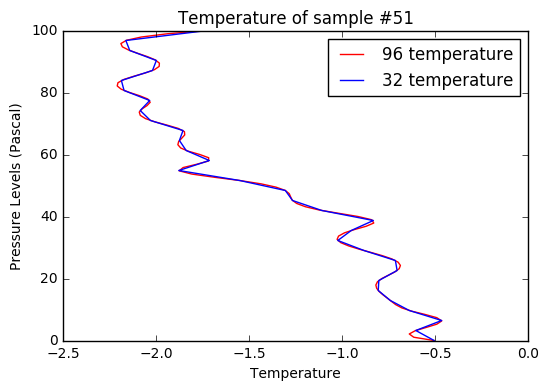

In [97]:
#temperature
a = [-0.50553716, -0.61478965, -0.63901615, -0.60715693, -0.54815224, -0.49094234,
 -0.4644675,  -0.49118974, -0.55526699, -0.62683005, -0.67949185, -0.71222651,
 -0.73517112, -0.75758818, -0.78048669, -0.80053098, -0.81435168, -0.8186371,
 -0.8101117,  -0.78604306, -0.75141615, -0.71695829, -0.69329216, -0.68657322,
 -0.69901987, -0.73251986, -0.78409602, -0.84569718, -0.90903503, -0.9658392,
 -1.00786149, -1.02693812, -1.01919446, -0.98703399, -0.93347498, -0.87123702,
 -0.82991973, -0.84068493, -0.91458242, -1.02090468, -1.12377601, -1.19790334,
 -1.24433526, -1.26815171, -1.27671804, -1.28425466, -1.30626188, -1.35557422,
 -1.43534565, -1.54653333, -1.6830902, -1.80810361 ,-1.8761614,  -1.85493933,
 -1.7822112,  -1.71912019, -1.71721229, -1.76519428, -1.82652762, -1.8679567,
 -1.88315414, -1.87876231, -1.86208912, -1.84625605, -1.84772571, -1.88133667,
 -1.94099288, -2.0062959,  -2.05726973, -2.08524754, -2.09072245, -2.07490224,
 -2.04862747, -2.03197459, -2.04475717, -2.08825077, -2.14269697, -2.1873817,
 -2.20918094, -2.20517132, -2.17325842, -2.11860433, -2.05794707, -2.0090072,
 -1.98362419, -1.9824653,  -2.00493478, -2.04730684, -2.09874448, -2.14742847,
 -2.18157383, -2.18948911, -2.15949868, -2.07992693, -1.93909822, -1.72533694]
b = [-0.50553716, -0.60385945, -0.46478618, -0.63902122, -0.74074759, -0.80583071,
 -0.80267262, -0.70436219, -0.7136264,  -0.88279403, -1.02326905, -0.95098816,
 -0.83217263, -1.1088836,  -1.26669313, -1.30516749, -1.55065388, -1.87804059,
 -1.71397318, -1.83846601, -1.87477982, -1.85552005, -2.03039939, -2.08551791,
 -2.03430199, -2.17248567, -2.18667293, -2.01956111, -1.99877905, -2.14171555,
 -2.16280474, -1.72533694]


y1 = np.linspace(0, 100, len(a))
y2 = np.linspace(0, 100, len(b))

plt.figure()
plt.title("Temperature of sample #{}".format(id_file))
plt.xlabel("Temperature")
plt.ylabel("Pressure Levels (Pascal)")
plt.plot(a, y1, label="96 temperature", color='red' )
plt.plot(b, y2, label="32 temperature",color='blue')

plt.legend()
plt.show()